In [1]:
import numpy as np
import pandas as pd
import os as os

In [2]:
os.chdir('../')

In [3]:
%pylab inline
exec(open("./run_model.py").read())
exec(open("./get_signal_names.py").read())
exec(open("./portfolio_optimizer.py").read())

import datetime
from pylab import rcParams


Populating the interactive namespace from numpy and matplotlib


In [4]:
#sig_dir = '/Users/raghuramkowdeed/Desktop/afp_data/1000/ranked_rps_data/'
#fac_data_dir='/Users/raghuramkowdeed/Desktop/afp_data/1000/factor_exposure_data/'
#fac_ret_file = '/Users/raghuramkowdeed/Desktop/afp_data/1000/fac_ret_file.csv'

sig_type = 'rank'
#rank
#norm
size_tag = '0_500'
#0_3000
#0_500
#500_3000
#use_pickle = True 


    

sig_dir =      '../afp_data/' + sig_type + '/' +  size_tag + '/rps_data/'
fac_data_dir=  '../afp_data/' + sig_type + '/' +  size_tag + '/factor_exposure_data/'
fac_ret_file = '../afp_data/' + sig_type + '/' +  size_tag + '/fac_ret_file.csv'

    

In [5]:
use_pickle = True 

if use_pickle :
    file_name = '../afp_pickle/'+'sig_'+sig_type +'_'+size_tag +'.pkl' 
    sig_df = pd.read_pickle(file_name)
    #sig_df = pd.read_pickle('../afp_pickle/_rank_0_500.pkl')
else :
    sig_df = pd.DataFrame()
    sig_files = os.listdir(sig_dir)
    sig_files = np.sort(sig_files)



    for sig_file in sig_files :
        if '.csv' not in sig_file :
            continue
        print(sig_file)
        this_file = sig_dir + sig_file
        this_df = pd.read_csv(this_file, index_col = 'date')
        this_df.index = [ datetime.datetime.strptime(val, '%Y-%m-%d') for val in this_df.index]
        #this_df = this_df.sort_values(['mve'], ascending=False)
        #this_df = this_df.iloc[start_stock_ind:end_stock_ind,:]
        sig_df = sig_df.append(this_df)
    #data = sig_df.copy()

In [6]:
'../afp_pickle/si'
#model_name = 'pls_regression'
#train_model_arg = { 'n_components':20, 'scale':True, 'max_iter':5000, 'tol':1e-08, 'copy':True }



'../afp_pickle/si'

In [7]:
begin_date = datetime.datetime.strptime('19900101', '%Y%m%d')
end_date = datetime.datetime.strptime('20170101', '%Y%m%d')

sig_df = sig_df[(sig_df.index>=begin_date) & (sig_df.index<end_date)]
sig_df = sig_df.fillna(sig_df.mean())

In [8]:
'res_ret' in sig_df.columns

True

In [9]:
#factor_names =  ['beta','mve', 'bm', 'roic', 'agr', 'mom12m', 'idiovol']
factor_names =  ['beta']
sig_names = get_signal_names()
ret_sr = sig_df['ret']
sig_df = sig_df[sig_names]
sig_df = sig_df.drop(factor_names, axis=1)
sig_df = sig_df.drop(['idiovol'], axis=1)
ff_sig_df = sig_df[[ 'mve', 'bm', 'roic', 'agr', 'mom12m',]]

In [10]:
pm = PortfolioOptimizer(fac_data_dir=fac_data_dir,
                        fac_ret_file = fac_ret_file,
                        fac_cov_hl = 12.0,
                        fac_names = None
                       )

--------


In [11]:
signs_dict = get_signal_signs()

signs_vec = []

for i in   ff_sig_df.columns :
    signs_vec.append(signs_dict[i])

In [12]:
# pnl_df = pd.DataFrame()


# #these_signals = ['mve', 'bm', 'roic', 'agr', 'mom12m',]
# these_signals = sig_df.columns
# sig_signs = get_signal_signs()

# for sig_name in these_signals :
#     print(sig_name)
    
#     try :
#         #t0 = time.time()
#         #print(sig_name)
#         this_sign = sig_signs[sig_name]
#         this_sig_sr = sig_df[ [sig_name] ].copy()*np.sign(this_sign)
        
#         #unmodified signal
#         pnl_sr = pm.run_signal(this_sig_sr.iloc[:,0], neu_sig=True)
#         pnl_df[sig_name] = pnl_sr
#         print(pnl_sr.mean()*sqrt(12.0)/pnl_sr.std())
        
        
#     except Exception as e :
#         print(e)

In [13]:
file_name = '../afp_pickle/'+'pnl_'+sig_type +'_'+size_tag +'.pkl' 
pnl_df = pd.read_pickle(file_name)
    #sig_df = pd.read_pickle('../afp_pickle/_rank_0_500.pkl')

sharpe ratio = 1.04357789442


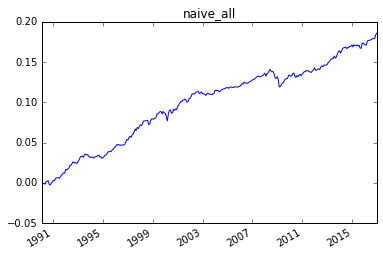

In [14]:
x = pnl_df

all_naive_pnl_sr = x.mean(axis=1)
all_naive_shrp = all_naive_pnl_sr.mean()*sqrt(12)/all_naive_pnl_sr.std()

print( 'sharpe ratio = '+ str(all_naive_shrp)  )
all_naive_pnl_sr.cumsum().plot()
pylab.title('naive_all')

In [15]:
look_back = 1
sample_decay = 0.5

-----------
-----------
sharpe ratio = 0.56781886666


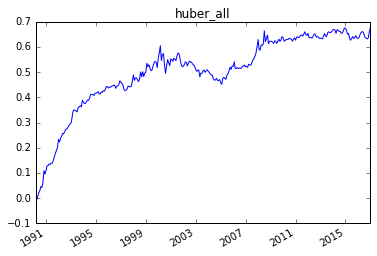

In [16]:
model_name = 'huber_regression'
train_model_arg = None

signs_dict = get_signal_signs_2()

signs_vec = []

for i in   sig_df.columns :
    signs_vec.append(signs_dict[i])

all_hr_sig_sr, all_hr_model_vec = run_model( sig_df, ret_sr, model_name, train_model_arg=train_model_arg, 
                          pred_model_arg ={},look_back=look_back, sample_decay = sample_decay, signs_vec=signs_vec)

all_hr_pnl_sr = pm.run_signal(all_hr_sig_sr, neu_sig=True)
all_hr_pnl_sr.cumsum().plot()
all_hr_shrp = all_hr_pnl_sr.mean()*sqrt(12)/all_hr_pnl_sr.std()
print( 'sharpe ratio = ' + str(all_hr_shrp) )
pylab.title('huber_all')

-----------
-----------
sharpe ratio = 0.3860930288


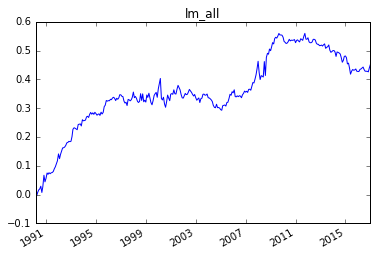

In [17]:
model_name = 'linear_regression'
train_model_arg = None

signs_dict = get_signal_signs()

signs_vec = []

for i in   sig_df.columns :
    signs_vec.append(signs_dict[i])

all_lm_sig_sr, all_lm_model_vec = run_model( sig_df, ret_sr, model_name, train_model_arg=train_model_arg, 
                          pred_model_arg ={},look_back=look_back, sample_decay = sample_decay, signs_vec=signs_vec)
all_lm_pnl_sr = pm.run_signal(all_lm_sig_sr, neu_sig=True)
all_lm_pnl_sr.cumsum().plot()
all_lm_shrp = all_lm_pnl_sr.mean()*sqrt(12)/all_lm_pnl_sr.std()
print( 'sharpe ratio = ' + str(all_lm_shrp) )
pylab.title('lm_all')

-----------
-----------
sharpe ratio = 0.197155035596


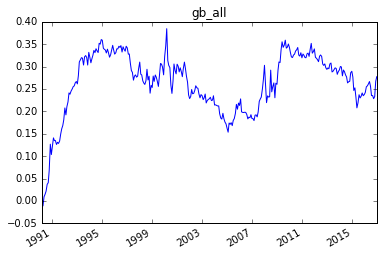

In [18]:
model_name = 'gradient_boost'
train_model_arg = None

signs_dict = get_signal_signs()

signs_vec = []

for i in   sig_df.columns :
    signs_vec.append(signs_dict[i])

all_gb_sig_sr, all_gb_model_vec = run_model( sig_df, ret_sr, model_name, train_model_arg=train_model_arg, 
                          pred_model_arg ={},look_back=look_back, sample_decay = sample_decay, signs_vec=signs_vec)
all_gb_pnl_sr = pm.run_signal(all_gb_sig_sr, neu_sig=True)
all_gb_pnl_sr.cumsum().plot()
all_gb_shrp = all_gb_pnl_sr.mean()*sqrt(12)/all_gb_pnl_sr.std()
print( 'sharpe ratio = ' + str(all_gb_shrp) )
pylab.title('gb_all')

/Users/raghuramkowdeed/Applications/anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:312: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  (fan_in, fan_out))
/Users/raghuramkowdeed/Applications/anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:314: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  fan_out)
/Users/raghuramkowdeed/Applications/anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:364: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  for n_fan_out in layer_units[1:])
/Users/raghuramkowdeed/Applications/anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:368: VisibleDeprecationWarning: using a non-integer number instead of an integer will resul

-----------
-----------
sharpe ratio = -0.265607774716


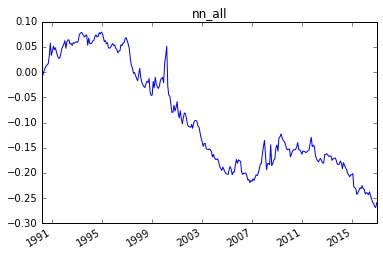

In [19]:
model_name = 'neural_net'
train_model_arg = None

signs_dict = get_signal_signs()

signs_vec = []

for i in   sig_df.columns :
    signs_vec.append(signs_dict[i])

all_nn_sig_sr, all_nn_model_vec = run_model( sig_df, ret_sr, model_name, train_model_arg=train_model_arg, 
                          pred_model_arg ={},look_back=look_back, sample_decay = sample_decay, signs_vec=signs_vec)
all_nn_pnl_sr = pm.run_signal(all_nn_sig_sr, neu_sig=True)
all_nn_pnl_sr.cumsum().plot()
all_nn_shrp = all_nn_pnl_sr.mean()*sqrt(12)/all_nn_pnl_sr.std()
print( 'sharpe ratio = ' + str(all_nn_shrp) )
pylab.title('nn_all')

In [20]:
all_pnl_df = pd.DataFrame()

all_pnl_df['naive_all'] = all_naive_pnl_sr

all_pnl_df['lm_all'] = all_lm_pnl_sr

all_pnl_df['hr_all'] = all_hr_pnl_sr

all_pnl_df['gb_all'] = all_gb_pnl_sr

all_pnl_df['nn_all'] = all_nn_pnl_sr



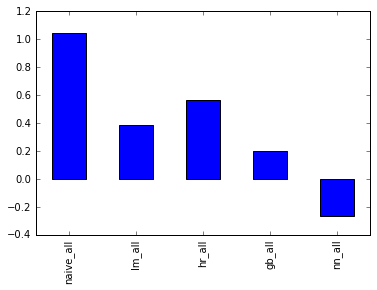

In [21]:
shrp_vec = all_pnl_df.mean()*sqrt(12)/all_pnl_df.std()
shrp_vec.plot(kind='bar')

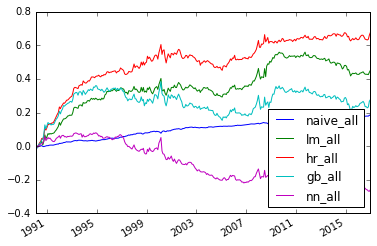

In [22]:

all_pnl_df.cumsum().plot()